## Chamber Data Processing

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import matplotlib as mpl
mpl.rcParams["mathtext.default"] = 'regular'#(default: 'regular')

Position
1    1.134027
2    2.879647
Name: Flux, dtype: float64
Position
1    1.427486
2    4.706416
Name: Flux, dtype: float64
1.6688999999999998


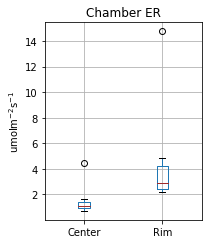

In [9]:
class ChamberAnalysis:
    def __init__(self,Path,flux):
        self.Data = pd.read_csv(Path,delimiter = ',')
        self.Data.loc[self.Data['Position']==3,'Position']=1
Path = 'C:\\FishIsland_2017\\ChamberStationData/ChamberFluxes.csv'
flux = 'CO2 Flux (umol/m2/s)'
CH = ChamberAnalysis(Path,flux)


# # CH.Data.loc[CH.Data.Flux>10,'Flux']=np.nan
CH.Data['Flux']*=12.0107*1e-6 * 1800*2*24


fig,ax=plt.subplots(figsize = (3,3.5))
# Data = CH.by_site['Veg']
# print(Data)
# X  = np.arange(0,10,.5)
# Data = [X,X*-1]
Data = CH.Data
# BP = [Data.loc[Data['Position']==1,'Flux'].dropna(),Data.loc[Data['Position']==2,'Flux'].dropna()]
# bp0 = plt.boxplot(BP)
# for item in bp0['medians']:
#     item.set_color('#a02c2c')
Data['PoMo'] = Data['Month'].astype(str)+Data['Position'].astype(str)
    
bp0 = Data[['Position','Flux']].boxplot(by='Position',ax=ax,return_type='dict')

[[item.set_color('#a02c2c') for item in bp0[key]['medians']] for key in bp0.keys()]
fig.suptitle(None)
ax.set_title('Chamber ER')
ax.set_ylabel('${u}mol m^{-2} s^{-1}$')
# ax.set_xticklabels([1,2],)

# ax.set_xticks([1,2]) 
ax.set_xticklabels(['Center','Rim'])
# ax.set_xticklabels(['Center 7/10','Rim 7/10','Center 8/21','Rim 8/21'])
ax.set_xlabel(None)
# # plt.yscale('symlog')
# plt.ylim(0,10)
# plt.show()

# print(CH.Data.groupby(['Position','Month']).mean())#.mean(axis=1))
# print()
print(CH.Data.groupby(['Position']).median()['Flux'])


print(CH.Data.groupby(['Position']).mean()['Flux']*12.01*1e-6*3600*24)#.mean(axis=1))

# print(CH.Data.groupby('Position').std()/(CH.Data[['Flux','Position']].groupby('Position').count())**.5*stats.t.ppf(.025,CH.Data[['Flux','Position']].groupby('Position').count()))#.std(axis=1))
plt.tight_layout()
plt.savefig('Fig4.png')

# print(CH.Data.groupby('Position').count())

print(.63*1.13+.33*2.90)
# print(.755*0.957289+.245*2.632228)



In [16]:
# Path = 'C:/Illisarvik/ChamberData.csv'

# print(Veg.groupby(Veg['Site']).mean())
# print(Veg.groupby(Veg['Site']).std())
# print(Veg)
# Parse()

In [21]:


print(CH.Data)

# print(CH.Data)
# plt.figure()
# plt.boxplot(data)
# # print(data)

# plt.show()

   Unnamed: 0        Flux  Position ID  Month
0          1A   20.809392         1  A      6
1          1B   21.163738         1  B      6
2          1C   25.045451         1  C      6
3          1D         NaN         1  D      6
4          2A         NaN         2  A      7
5          2B         NaN         2  B      7
6          2C         NaN         2  C      7
7          2D         NaN         2  D      7
8          3A         NaN         1  A      8
9          3B         NaN         1  B      8
10         3C         NaN         1  C      8
11         3D         NaN         1  D      8
12         1A   17.846197         1  A      6
13         1B   16.354561         1  B      6
14         1C   12.651110         1  C      6
15         1D   15.276825         1  D      6
16         2A   46.213089         2  A      7
17         2B   34.267018         2  B      7
18         2C  170.728201         2  C      7
19         2D   25.291146         2  D      7
20         3A   51.642460         

In [69]:

# fake up some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low), 0)

# fake up some more data
spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d2 = np.concatenate((spread, center, flier_high, flier_low), 0)
data.shape = (-1, 1)
d2.shape = (-1, 1)
# data = concatenate( (data, d2), 1 )
# Making a 2-D array only works if all the columns are the
# same length.  If they are not, then use a list instead.
# This is actually more efficient because boxplot converts
# a 2-D array into a list of vectors internally anyway.
data = [data, d2, d2[::2, 0]]
# multiple box plots on one figure